In [145]:
#Importing the Libraries
import pandas as pd

from datetime import datetime

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
import sklearn as skl

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mandates
from sklearn import linear_model
%matplotlib inline


In [146]:
#Get the Dataset
data_train=pd.read_csv("NewData/BAC2016_2022.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
data_train.sort_values(by="Date", ascending = False)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-05-18,35.619999,35.689999,34.599998,34.880001,34.880001,47396900
2022-05-17,35.619999,36.220001,35.430000,35.990002,35.990002,42635600
2022-05-16,35.000000,35.169998,34.410000,34.810001,34.810001,39076500
2022-05-13,35.529999,35.730000,34.759998,35.169998,35.169998,49069300
2022-05-12,35.009998,35.430000,34.259998,35.070000,35.070000,61231500
...,...,...,...,...,...,...
2017-01-09,22.510000,22.709999,22.400000,22.549999,20.265772,75901500
2017-01-06,22.780001,22.850000,22.559999,22.680000,20.382603,66281500
2017-01-05,22.820000,22.930000,22.350000,22.680000,20.382603,86826400


In [147]:
data_train.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [148]:
#Print the shape of Dataframe  and Check for Null Values
print("Dataframe Shape: ", data_train. shape)
print("Null Value Present: ", data_train.isnull().values.any())

Dataframe Shape:  (1354, 6)
Null Value Present:  False


In [149]:
# Use close price to Train the model

training_set = data_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[22.68    ]
 [22.959999]
 [22.93    ]
 ...
 [35.169998]
 [36.220001]
 [35.689999]]
(1354, 1)


In [150]:
# Normalize the dataset (0,1): scale the dataset to be from 0 to 1: 

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)
scaled_training_set

array([[0.09888305],
       [0.10808144],
       [0.10709592],
       ...,
       [0.50919834],
       [0.54369252],
       [0.52628116]])

In [151]:
# Create X_train and y_train data structure

X_train = []
y_train = []
for i in range(60,1354):
    X_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)


In [152]:
print(X_train)

[[0.09888305 0.10808144 0.10709592 ... 0.11103807 0.13140604 0.13074901]
 [0.10808144 0.10709592 0.1044678  ... 0.13140604 0.13074901 0.14159001]
 [0.10709592 0.1044678  0.09986856 ... 0.13074901 0.14159001 0.14126146]
 ...
 [0.90735874 0.88272011 0.86432323 ... 0.56668848 0.5177398  0.52759525]
 [0.88272011 0.86432323 0.86859396 ... 0.5177398  0.52759525 0.50919834]
 [0.86432323 0.86859396 0.78876476 ... 0.52759525 0.50919834 0.54369252]]


In [153]:
print(X_train.shape)
print(y_train.shape)

(1294, 60)
(1294,)


In [154]:
# Reshape the data

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape

(1294, 60, 1)

In [155]:
# by Importing the Crucial Libraries 

from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [156]:
# Building the Model by Adding Different Layers to LSTM

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))


In [157]:
# Fit the Model

regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs=30, batch_size=32)

Epoch 1/30
41/41 [==============================] - 5s 36ms/step - loss: 0.0239
Epoch 2/30
41/41 [==============================] - 2s 37ms/step - loss: 0.0071
Epoch 3/30
41/41 [==============================] - 2s 37ms/step - loss: 0.0067
Epoch 4/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0064
Epoch 5/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0058
Epoch 6/30
41/41 [==============================] - 1s 35ms/step - loss: 0.0054
Epoch 7/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0048
Epoch 8/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0052
Epoch 9/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0050
Epoch 10/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0046
Epoch 11/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0039
Epoch 12/30
41/41 [==============================] - 1s 36ms/step - loss: 0.0039
Epoch 13/30
41/41 [==================

In [158]:
# Use the current close price as sample dataset for prediction

data_test = data_train
data_test


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,22.600000,22.680000,22.200001,22.530001,20.247801,99298100
2017-01-04,22.719999,22.959999,22.600000,22.950001,20.625254,76875100
2017-01-05,22.820000,22.930000,22.350000,22.680000,20.382603,86826400
2017-01-06,22.780001,22.850000,22.559999,22.680000,20.382603,66281500
2017-01-09,22.510000,22.709999,22.400000,22.549999,20.265772,75901500
...,...,...,...,...,...,...
2022-05-12,35.009998,35.430000,34.259998,35.070000,35.070000,61231500
2022-05-13,35.529999,35.730000,34.759998,35.169998,35.169998,49069300
2022-05-16,35.000000,35.169998,34.410000,34.810001,34.810001,39076500


In [159]:
# prepare the inputs for the prediction model

dataset_total = pd.concat((data_train['Open'], data_train['Close']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(data_train)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [160]:
X_test = []
for x in range(60,80):
    X_test.append(inputs[x-60:x,0])
X_test = np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [161]:
predicted_prices = regressor.predict(X_test)
predicted_prices

array([[0.49674594],
       [0.4665147 ],
       [0.41306305],
       [0.3416143 ],
       [0.26228255],
       [0.18519503],
       [0.11895079],
       [0.06962153],
       [0.04008056],
       [0.03019734],
       [0.03608006],
       [0.05276405],
       [0.07495186],
       [0.09803934],
       [0.11846893],
       [0.134505  ],
       [0.14607981],
       [0.15376338],
       [0.15808846],
       [0.15904456]], dtype=float32)

In [162]:
# List prices in the next 20 days: 
predicted_prices= scaler.inverse_transform(predicted_prices)
predicted_prices

array([[34.790947],
       [33.87071 ],
       [32.24364 ],
       [30.06874 ],
       [27.653881],
       [25.307337],
       [23.290863],
       [21.789278],
       [20.890053],
       [20.589207],
       [20.768278],
       [21.276138],
       [21.951534],
       [22.654318],
       [23.276196],
       [23.764332],
       [24.116669],
       [24.350557],
       [24.482212],
       [24.511316]], dtype=float32)

In [163]:
len(predicted_prices)


20

In [164]:
# df in future 20days

pred_df=pd.DataFrame({'Date': ['2022-05-19','2022-05-20','2022-05-21','2022-05-22',
                        '2022-05-23','2022-05-24','2022-05-25','2022-05-26',
                        '2022-05-27','2022-05-28','2022-05-29','2022-05-30',
                        '2022-05-31','2022-06-01','2022-06-02','2022-06-03',
                        '2022-06-04','2022-06-05','2022-06-06','2022-06-07'
                        ]
                     }
)
pred_df['pred_close']=predicted_prices
pred_df.set_index('Date', inplace=True)
pred_df.head(21)

,pred_close
Date,
2022-05-19,34.790947
2022-05-20,33.870708
2022-05-21,32.243641
2022-05-22,30.068741
2022-05-23,27.653881
2022-05-24,25.307337
2022-05-25,23.290863
2022-05-26,21.789278
2022-05-27,20.890053


In [165]:
data_train.iloc[1334:1354,1]

Date
2022-04-21    40.209999
2022-04-22    38.849998
2022-04-25    37.400002
2022-04-26    37.540001
2022-04-27    36.910000
2022-04-28    36.950001
2022-04-29    37.130001
2022-05-02    36.279999
2022-05-03    37.630001
2022-05-04    38.750000
2022-05-05    38.209999
2022-05-06    37.619999
2022-05-09    37.060001
2022-05-10    37.130001
2022-05-11    36.919998
2022-05-12    35.430000
2022-05-13    35.730000
2022-05-16    35.169998
2022-05-17    36.220001
2022-05-18    35.689999
Name: High, dtype: float64

In [166]:
len(data_train.iloc[:,1])

1354

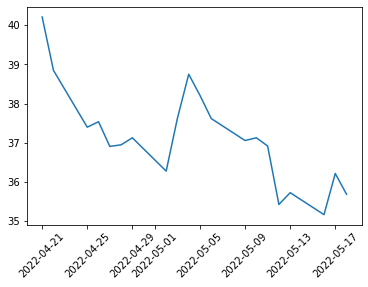

<Figure size 2880x1440 with 0 Axes>

In [167]:
plt.plot(data_train.iloc[1334:1354,1])
plt.xticks(rotation=45)
plt.figure(figsize = (40,20))
plt.tight_layout()

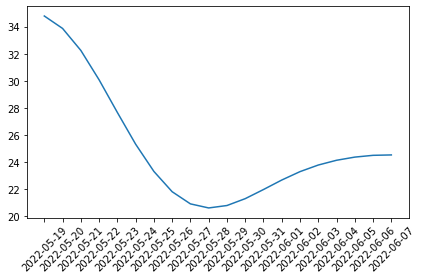

In [168]:
plt.plot(pred_df['pred_close'])
plt.xticks(rotation = 45)
plt.tight_layout()

In [169]:
pred_df.head()

,pred_close
Date,
2022-05-19,34.790947
2022-05-20,33.870708
2022-05-21,32.243641
2022-05-22,30.068741
2022-05-23,27.653881
